# Feed Forward Neural Network

En este notebook trabajaremos con los datos de los marcadores e intentaremos clasificar las muestras de aceite de oliva con redes neuronales **Feed Forward**. Básicamente los pasos que seguiremos son los siguientes:
- Lectura de datos ya normalizados
- Preprocesamiento
    - Encoding de los datos (modelo ternario/binario)
- Entrenamiento de una red básica
- Búsqueda de hiperparámetros



In [64]:
#Importar librerías
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


np.random.seed(7)

# Lectura de datos ya normalizados

In [53]:
normalizados = pd.read_excel('data/marcadores/normalizados.xlsx')
normalizados.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M105,M106,M107,M108,M109,M110,M111,M112,M113,Class
0,0.141858,0.117761,0.075981,0.220948,0.108434,0.038282,0.020016,0.042752,0.104742,0.072872,...,0.038282,0.047415,0.022542,0.009133,0.066848,0.052857,0.078119,0.028566,0.045861,E
1,0.140789,0.110150,0.090602,0.178008,0.132519,0.032143,0.022744,0.027256,0.067857,0.039662,...,0.027444,0.073872,0.014850,0.007331,0.039286,0.052444,0.054887,0.028571,0.049060,E
2,0.149605,0.135146,0.070947,0.198188,0.117794,0.033353,0.019665,0.038558,0.113939,0.075766,...,0.034702,0.027762,0.014459,0.009061,0.048197,0.038558,0.078080,0.053788,0.028533,E
3,0.048249,0.205985,0.180469,0.214103,0.197402,0.038506,0.022965,0.044305,0.083739,0.049408,...,0.050336,0.130596,0.025284,0.008815,0.025516,0.046161,0.088147,0.042218,0.061239,E
4,0.010890,0.224685,0.090944,0.200994,0.109859,0.031525,0.016431,0.054834,0.064005,0.049484,...,0.025602,0.113680,0.016431,0.006114,0.043943,0.039740,0.073558,0.035155,0.071456,E


# Preprocesamiento

## Encoding

Como se comentó anteriormente, algunos algoritmos utilizados en minería de datos no trabajan bien con clases de tipo categóricas, es por ello por lo que hay que convertirlo a números. Haremos un encoding para distinguir entre cada uno de los modelos que entrenaremos (ternarios y binarios)

In [54]:
normalizados_L_nonL = normalizados.copy()
normalizados_L_nonL.Class = normalizados_L_nonL.Class.map({ 'L':'1',
                                     'V':'0',
                                     'E':'0'                                     
                                       })

normalizados.Class = normalizados.Class.map({ 'L':'0',
                                     'V':'1',
                                     'E':'2'                                     
                                       })






In [57]:
normalizados.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M105,M106,M107,M108,M109,M110,M111,M112,M113,Class
0,0.141858,0.117761,0.075981,0.220948,0.108434,0.038282,0.020016,0.042752,0.104742,0.072872,...,0.038282,0.047415,0.022542,0.009133,0.066848,0.052857,0.078119,0.028566,0.045861,2
1,0.140789,0.110150,0.090602,0.178008,0.132519,0.032143,0.022744,0.027256,0.067857,0.039662,...,0.027444,0.073872,0.014850,0.007331,0.039286,0.052444,0.054887,0.028571,0.049060,2
2,0.149605,0.135146,0.070947,0.198188,0.117794,0.033353,0.019665,0.038558,0.113939,0.075766,...,0.034702,0.027762,0.014459,0.009061,0.048197,0.038558,0.078080,0.053788,0.028533,2
3,0.048249,0.205985,0.180469,0.214103,0.197402,0.038506,0.022965,0.044305,0.083739,0.049408,...,0.050336,0.130596,0.025284,0.008815,0.025516,0.046161,0.088147,0.042218,0.061239,2
4,0.010890,0.224685,0.090944,0.200994,0.109859,0.031525,0.016431,0.054834,0.064005,0.049484,...,0.025602,0.113680,0.016431,0.006114,0.043943,0.039740,0.073558,0.035155,0.071456,2


# Entrenamiento de una red básica

Podríamos empezar con una red súper compleja, como esta:
![title](img/Imagen8.png)
Pero la experiencia nos dice que mejor es empezar con la estructura de red más básica, y a partir de ahí ir mejorando:
![title](img/Imagen9.png)

Lo primero que haremos es crear una red neuronal con tres capas:
- 1 capa de entrada
- 1 capa oculta
- 1 capa de salida que realizará la predicción

Lo primero que tendremos que hacer es dividir el conjunto de datos en train/test, en este caso tomaremos un 80% de los datos para train y el 20% restante para test. Sklearn nos proporciona un método que lo realiza automáticamente, se llama **train_test_split**

## Modelo ternario

In [7]:
marcadores_normalizados = normalizados.drop(columns=['Class'])
y = normalizados.Class
X_train, X_test, y_train, y_test = train_test_split(marcadores_normalizados, y, test_size=20, random_state=42)


In [8]:
normalizados.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M105,M106,M107,M108,M109,M110,M111,M112,M113,Class
0,0.141858,0.117761,0.075981,0.220948,0.108434,0.038282,0.020016,0.042752,0.104742,0.072872,...,0.038282,0.047415,0.022542,0.009133,0.066848,0.052857,0.078119,0.028566,0.045861,2
1,0.140789,0.110150,0.090602,0.178008,0.132519,0.032143,0.022744,0.027256,0.067857,0.039662,...,0.027444,0.073872,0.014850,0.007331,0.039286,0.052444,0.054887,0.028571,0.049060,2
2,0.149605,0.135146,0.070947,0.198188,0.117794,0.033353,0.019665,0.038558,0.113939,0.075766,...,0.034702,0.027762,0.014459,0.009061,0.048197,0.038558,0.078080,0.053788,0.028533,2
3,0.048249,0.205985,0.180469,0.214103,0.197402,0.038506,0.022965,0.044305,0.083739,0.049408,...,0.050336,0.130596,0.025284,0.008815,0.025516,0.046161,0.088147,0.042218,0.061239,2
4,0.010890,0.224685,0.090944,0.200994,0.109859,0.031525,0.016431,0.054834,0.064005,0.049484,...,0.025602,0.113680,0.016431,0.006114,0.043943,0.039740,0.073558,0.035155,0.071456,2


In [14]:
model = Sequential() ## Inicializamos el modelo
model.add(Dense(50, input_dim=113, activation="relu")) # Capa oculta
model.add(Dense(3, activation = 'softmax')) # Capa de salida con 3 neuronas (tenemos 3 clases en el modelo ternario)
    
# compilar el modelo
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=10,verbose=1, validation_data = (X_test, y_test))

## Evaluamos el modelo
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 513 samples, validate on 20 samples
Epoch 1/10
513/513 [==============================] - 1s 1ms/step - loss: 1.0919 - acc: 0.4074 - val_loss: 1.1038 - val_acc: 0.4000
Epoch 2/10
513/513 [==============================] - 0s 62us/step - loss: 1.0138 - acc: 0.5205 - val_loss: 1.0938 - val_acc: 0.4000
Epoch 3/10
513/513 [==============================] - 0s 62us/step - loss: 0.9900 - acc: 0.5205 - val_loss: 1.0572 - val_acc: 0.4000
Epoch 4/10
513/513 [==============================] - 0s 71us/step - loss: 0.9695 - acc: 0.5205 - val_loss: 1.0590 - val_acc: 0.4000
Epoch 5/10
513/513 [==============================] - 0s 63us/step - loss: 0.9508 - acc: 0.5244 - val_loss: 1.0430 - val_acc: 0.4000
Epoch 6/10
513/513 [==============================] - 0s 66us/step - loss: 0.9293 - acc: 0.5341 - val_loss: 1.0300 - val_acc: 0.4000
Epoch 7/10
513/513 [==============================] - 0s 59us/step - loss: 0.9081 - acc: 0.5906 - val_loss: 0.9981 - val_acc: 0.5500
Epoch 8/10
513/513 [=====

Hasta ahora hemos insertado unos parámetros al azar. El primer parámetro que vamos a tener en cuenta es el número de **epochs**, para entender mejor qué significa echemos un vistazo a la siguiente imagen
![title](img/Imagen10.png)
Lo más lógico es pensar que a más epochs, el accuracy es mayor, y en cierta manera es así, pero ¿cuál es el número óptimo de epochs?. El proceso a seguir es simple, ejecutar el algoritmo para diferentes números de epochs y ver cómo se comporta la red neuronal, representando en una gráfica el accuracy obtenido en base al número de estos. <br>
Otro aspecto a tener en cuenta es que llega un momento en el que el algoritmo se sobreentrena, es aquí cuando hay que parar. Este concepto se puede ver mejor en la siguiente imagen:
![title](img/Imagen11.png)

Veamos un ejemplo:

In [19]:
model = Sequential() ## Inicializamos el modelo
model.add(Dense(50, input_dim=113, activation="relu")) # Capa oculta
model.add(Dense(3, activation = 'softmax')) # Capa de salida con 3 neuronas (tenemos 3 clases en el modelo ternario)
    
# compilar el modelo
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=500,verbose=1, validation_data = (X_test, y_test))


Train on 513 samples, validate on 20 samples
Epoch 1/500
513/513 [==============================] - 1s 1ms/step - loss: 1.0316 - acc: 0.5263 - val_loss: 1.1356 - val_acc: 0.4000
Epoch 2/500
513/513 [==============================] - 0s 68us/step - loss: 0.9928 - acc: 0.5205 - val_loss: 1.0985 - val_acc: 0.4000
Epoch 3/500
513/513 [==============================] - 0s 72us/step - loss: 0.9644 - acc: 0.5224 - val_loss: 1.0805 - val_acc: 0.4000
Epoch 4/500
513/513 [==============================] - 0s 67us/step - loss: 0.9451 - acc: 0.5322 - val_loss: 1.0610 - val_acc: 0.4500
Epoch 5/500
513/513 [==============================] - 0s 81us/step - loss: 0.9268 - acc: 0.5750 - val_loss: 1.0442 - val_acc: 0.4500
Epoch 6/500
513/513 [==============================] - 0s 71us/step - loss: 0.9095 - acc: 0.6043 - val_loss: 1.0289 - val_acc: 0.4500
Epoch 7/500
513/513 [==============================] - 0s 79us/step - loss: 0.8937 - acc: 0.5867 - val_loss: 1.0397 - val_acc: 0.4500
Epoch 8/500
513/51

513/513 [==============================] - 0s 77us/step - loss: 0.5687 - acc: 0.7427 - val_loss: 0.7530 - val_acc: 0.6500
Epoch 62/500
513/513 [==============================] - 0s 72us/step - loss: 0.5651 - acc: 0.7934 - val_loss: 0.7552 - val_acc: 0.6500
Epoch 63/500
513/513 [==============================] - 0s 61us/step - loss: 0.5366 - acc: 0.7934 - val_loss: 0.7931 - val_acc: 0.6500
Epoch 64/500
513/513 [==============================] - 0s 62us/step - loss: 0.5348 - acc: 0.7895 - val_loss: 0.7645 - val_acc: 0.6500
Epoch 65/500
513/513 [==============================] - 0s 83us/step - loss: 0.5444 - acc: 0.7758 - val_loss: 0.7830 - val_acc: 0.6500
Epoch 66/500
513/513 [==============================] - 0s 73us/step - loss: 0.5310 - acc: 0.7992 - val_loss: 0.7407 - val_acc: 0.6500
Epoch 67/500
513/513 [==============================] - 0s 59us/step - loss: 0.5319 - acc: 0.7875 - val_loss: 0.7722 - val_acc: 0.6500
Epoch 68/500
513/513 [==============================] - 0s 64us/step

513/513 [==============================] - 0s 59us/step - loss: 0.4560 - acc: 0.8148 - val_loss: 0.7009 - val_acc: 0.7000
Epoch 122/500
513/513 [==============================] - 0s 72us/step - loss: 0.4571 - acc: 0.8109 - val_loss: 0.7030 - val_acc: 0.7000
Epoch 123/500
513/513 [==============================] - 0s 58us/step - loss: 0.4553 - acc: 0.8129 - val_loss: 0.7130 - val_acc: 0.7000
Epoch 124/500
513/513 [==============================] - 0s 64us/step - loss: 0.4576 - acc: 0.8090 - val_loss: 0.6646 - val_acc: 0.7000
Epoch 125/500
513/513 [==============================] - 0s 70us/step - loss: 0.4702 - acc: 0.8109 - val_loss: 0.6940 - val_acc: 0.7000
Epoch 126/500
513/513 [==============================] - 0s 60us/step - loss: 0.4556 - acc: 0.8226 - val_loss: 0.7004 - val_acc: 0.7000
Epoch 127/500
513/513 [==============================] - 0s 58us/step - loss: 0.4560 - acc: 0.8070 - val_loss: 0.6928 - val_acc: 0.7000
Epoch 128/500
513/513 [==============================] - 0s 59

513/513 [==============================] - 0s 69us/step - loss: 0.4142 - acc: 0.8324 - val_loss: 0.6942 - val_acc: 0.7500
Epoch 182/500
513/513 [==============================] - 0s 76us/step - loss: 0.4141 - acc: 0.8304 - val_loss: 0.6910 - val_acc: 0.7000
Epoch 183/500
513/513 [==============================] - 0s 66us/step - loss: 0.4145 - acc: 0.8402 - val_loss: 0.6799 - val_acc: 0.7500
Epoch 184/500
513/513 [==============================] - 0s 64us/step - loss: 0.4110 - acc: 0.8363 - val_loss: 0.6516 - val_acc: 0.7500
Epoch 185/500
513/513 [==============================] - 0s 66us/step - loss: 0.4254 - acc: 0.8343 - val_loss: 0.6714 - val_acc: 0.7500
Epoch 186/500
513/513 [==============================] - 0s 66us/step - loss: 0.4105 - acc: 0.8343 - val_loss: 0.7034 - val_acc: 0.7500
Epoch 187/500
513/513 [==============================] - 0s 77us/step - loss: 0.4104 - acc: 0.8343 - val_loss: 0.6737 - val_acc: 0.7500
Epoch 188/500
513/513 [==============================] - 0s 69

513/513 [==============================] - 0s 63us/step - loss: 0.3948 - acc: 0.8519 - val_loss: 0.6856 - val_acc: 0.7500
Epoch 242/500
513/513 [==============================] - 0s 75us/step - loss: 0.3980 - acc: 0.8480 - val_loss: 0.6812 - val_acc: 0.7500
Epoch 243/500
513/513 [==============================] - 0s 59us/step - loss: 0.3895 - acc: 0.8499 - val_loss: 0.6779 - val_acc: 0.7500
Epoch 244/500
513/513 [==============================] - 0s 61us/step - loss: 0.3980 - acc: 0.8460 - val_loss: 0.7286 - val_acc: 0.7500
Epoch 245/500
513/513 [==============================] - 0s 78us/step - loss: 0.3849 - acc: 0.8519 - val_loss: 0.7007 - val_acc: 0.7500
Epoch 246/500
513/513 [==============================] - 0s 59us/step - loss: 0.3908 - acc: 0.8480 - val_loss: 0.6892 - val_acc: 0.7500
Epoch 247/500
513/513 [==============================] - 0s 74us/step - loss: 0.3863 - acc: 0.8655 - val_loss: 0.6743 - val_acc: 0.7500
Epoch 248/500
513/513 [==============================] - 0s 65

513/513 [==============================] - 0s 81us/step - loss: 0.3640 - acc: 0.8538 - val_loss: 0.7078 - val_acc: 0.7500
Epoch 302/500
513/513 [==============================] - 0s 83us/step - loss: 0.3630 - acc: 0.8577 - val_loss: 0.6869 - val_acc: 0.7500
Epoch 303/500
513/513 [==============================] - 0s 73us/step - loss: 0.3621 - acc: 0.8655 - val_loss: 0.7113 - val_acc: 0.7500
Epoch 304/500
513/513 [==============================] - 0s 66us/step - loss: 0.3651 - acc: 0.8538 - val_loss: 0.6788 - val_acc: 0.7500
Epoch 305/500
513/513 [==============================] - 0s 62us/step - loss: 0.3663 - acc: 0.8733 - val_loss: 0.7054 - val_acc: 0.7500
Epoch 306/500
513/513 [==============================] - 0s 65us/step - loss: 0.3623 - acc: 0.8577 - val_loss: 0.6909 - val_acc: 0.7500
Epoch 307/500
513/513 [==============================] - 0s 70us/step - loss: 0.3602 - acc: 0.8596 - val_loss: 0.7259 - val_acc: 0.7500
Epoch 308/500
513/513 [==============================] - 0s 66

513/513 [==============================] - 0s 62us/step - loss: 0.3468 - acc: 0.8694 - val_loss: 0.6789 - val_acc: 0.7000
Epoch 362/500
513/513 [==============================] - 0s 76us/step - loss: 0.3423 - acc: 0.8655 - val_loss: 0.7028 - val_acc: 0.7500
Epoch 363/500
513/513 [==============================] - 0s 64us/step - loss: 0.3409 - acc: 0.8713 - val_loss: 0.7306 - val_acc: 0.7500
Epoch 364/500
513/513 [==============================] - 0s 61us/step - loss: 0.3430 - acc: 0.8635 - val_loss: 0.6801 - val_acc: 0.7000
Epoch 365/500
513/513 [==============================] - 0s 66us/step - loss: 0.3416 - acc: 0.8811 - val_loss: 0.7364 - val_acc: 0.7500
Epoch 366/500
513/513 [==============================] - 0s 63us/step - loss: 0.3452 - acc: 0.8558 - val_loss: 0.6882 - val_acc: 0.7000
Epoch 367/500
513/513 [==============================] - 0s 59us/step - loss: 0.3418 - acc: 0.8733 - val_loss: 0.7508 - val_acc: 0.7500
Epoch 368/500
513/513 [==============================] - 0s 64

513/513 [==============================] - 0s 76us/step - loss: 0.3727 - acc: 0.8558 - val_loss: 0.6589 - val_acc: 0.7000
Epoch 422/500
513/513 [==============================] - 0s 76us/step - loss: 0.3423 - acc: 0.8772 - val_loss: 0.7350 - val_acc: 0.7500
Epoch 423/500
513/513 [==============================] - 0s 84us/step - loss: 0.3256 - acc: 0.8674 - val_loss: 0.6787 - val_acc: 0.7000
Epoch 424/500
513/513 [==============================] - 0s 78us/step - loss: 0.3422 - acc: 0.8850 - val_loss: 0.7568 - val_acc: 0.7500
Epoch 425/500
513/513 [==============================] - 0s 71us/step - loss: 0.3310 - acc: 0.8694 - val_loss: 0.7347 - val_acc: 0.7500
Epoch 426/500
513/513 [==============================] - 0s 66us/step - loss: 0.3240 - acc: 0.8713 - val_loss: 0.6847 - val_acc: 0.7000
Epoch 427/500
513/513 [==============================] - 0s 61us/step - loss: 0.3610 - acc: 0.8713 - val_loss: 0.7292 - val_acc: 0.7500
Epoch 428/500
513/513 [==============================] - 0s 56

513/513 [==============================] - 0s 97us/step - loss: 0.3242 - acc: 0.8811 - val_loss: 0.7336 - val_acc: 0.7000
Epoch 482/500
513/513 [==============================] - 0s 69us/step - loss: 0.3080 - acc: 0.8947 - val_loss: 0.7429 - val_acc: 0.7000
Epoch 483/500
513/513 [==============================] - 0s 65us/step - loss: 0.3082 - acc: 0.8830 - val_loss: 0.7367 - val_acc: 0.7000
Epoch 484/500
513/513 [==============================] - 0s 73us/step - loss: 0.3096 - acc: 0.8967 - val_loss: 0.7445 - val_acc: 0.7000
Epoch 485/500
513/513 [==============================] - 0s 72us/step - loss: 0.3131 - acc: 0.8908 - val_loss: 0.7274 - val_acc: 0.7000
Epoch 486/500
513/513 [==============================] - 0s 68us/step - loss: 0.3070 - acc: 0.8850 - val_loss: 0.7594 - val_acc: 0.7000
Epoch 487/500
513/513 [==============================] - 0s 74us/step - loss: 0.3307 - acc: 0.8558 - val_loss: 0.7309 - val_acc: 0.7000
Epoch 488/500
513/513 [==============================] - 0s 87

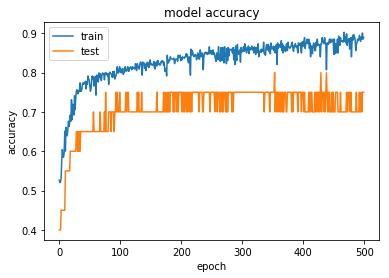

In [20]:
# Representemos en una gráfica el accuracy según el epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hasta ahora, los parámetros de la red han sido elegidos al azar. En cualquier proceso de minería de datos los parámetros a utilizar son un aspecto fundamental que hay que estudiar. En este caso, los parámetros a estudiar son:
- El número de neuronas en la capa oculta
- El optimizador a usar [optimizers](https://keras.io/optimizers/)
- La función de activación [activation function](https://keras.io/activations/)

Haremos uso de la función GridSearchCV que busca, dados unos parámetros de entrada, la mejor combinación para un problema en concreto, según una medida de evaluación

In [26]:
# Definimos una función que crea el modelo indicando unos parámetros por defecto
def create_model(act = 'softsign',optimizer = 'Adam', capa_oculta = 10):   
    model = Sequential()
    model.add(Dense(capa_oculta, input_dim=113, activation=act))
    model.add(Dense(3, activation = 'softmax'))
    
        # compilar el modelo
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [38]:
#Creamos el modelo
model = KerasClassifier(build_fn=create_model, epochs = 10, verbose = 2)

In [39]:
#Definimos los parámetros
capa_oculta = [10,20,80]
optimizer = ['Adam','SGD']
act = ['linear','relu','tanh','sigmoid']
p = {'capa_oculta': capa_oculta,
    'optimizer':optimizer,
    'act':act
    }

grid = GridSearchCV(estimator=model, param_grid=p,scoring='accuracy', verbose = 2, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
#resumen de los resultados
print("Mejor resultado: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.7s
C:\Programas\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.3min finished


Epoch 1/10
 - 1s - loss: 1.0349 - acc: 0.5205
Epoch 2/10
 - 0s - loss: 0.9882 - acc: 0.5322
Epoch 3/10
 - 0s - loss: 0.9554 - acc: 0.5263
Epoch 4/10
 - 0s - loss: 0.9174 - acc: 0.5634
Epoch 5/10
 - 0s - loss: 0.8884 - acc: 0.5867
Epoch 6/10
 - 0s - loss: 0.8586 - acc: 0.6101
Epoch 7/10
 - 0s - loss: 0.8308 - acc: 0.6218
Epoch 8/10
 - 0s - loss: 0.8108 - acc: 0.6218
Epoch 9/10
 - 0s - loss: 0.7896 - acc: 0.6452
Epoch 10/10
 - 0s - loss: 0.7724 - acc: 0.6959
Mejor resultado: 0.635478 usando {'act': 'tanh', 'capa_oculta': 80, 'optimizer': 'Adam'}


In [ ]:
## TODO: Viendo los parámetros que han salido en la ejecución anterior, modificar lo que sea necesario para obtener el mejor resultado
model = Sequential() ## Inicializamos el modelo
model.add(Dense(XXXXX, input_dim=113, activation="XXXXX")) # Capa oculta
model.add(Dense(3, activation = 'softmax')) # Capa de salida con 3 neuronas (tenemos 3 clases en el modelo ternario)
    
# compilar el modelo
model.compile(optimizer="XXXX",loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=10,verbose=1, validation_data = (X_test, y_test))

## Modelo binario

La red a entrenar es exactamente igual que la anterior, exceptuando que la capa de salida en vez de tener 3 neuronas (3 clases) ahora tendrá 2

In [62]:
# División del conjunto de datos en train y test
marcadores_normalizados_L_nonL = normalizados_L_nonL.drop(columns='Class')
y_L_nonL = normalizados_L_nonL.Class
X_train, X_test, y_train, y_test = train_test_split(marcadores_normalizados_L_nonL, y_L_nonL, test_size=20, random_state=42)

In [ ]:
## TODO: Sabiendo que la única diferencia con respecto al modelo anterior es el número de neuronas en la capa final, haga los cambios necesarios

model = Sequential() ## Inicializamos el modelo
model.add(Dense(XXXXX, input_dim=113, activation="XXXXX")) # Capa oculta
model.add(Dense(XXXXX, activation = 'softmax')) # Capa de salida con 3 neuronas (tenemos 3 clases en el modelo ternario)
    
# compilar el modelo
model.compile(optimizer="XXXX",loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=10,verbose=1, validation_data = (X_test, y_test))